In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import gc

In [ ]:
adata = sc.read_10x_mtx('../Data/') #数据已经过作者筛选，已标准化，已稀疏矩阵化，共166533细胞

In [ ]:
adata

In [ ]:
adata.write('../Data/all_cell_adata.h5ad')

# pre-processing

In [50]:
adata = sc.read_h5ad('../Data/all_cell_adata.h5ad')

In [7]:
adata.X.dtype

dtype('float32')

In [51]:
adata.obs['sample'] = adata.obs.index.str.slice(0,5)

In [9]:
ribo_genes = pd.read_table('../../1_scanpy/ribo_genes.txt',skiprows=2, header=None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [52]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
#upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
#adata = adata[adata.obs.n_genes_by_counts < upper_lim]
#adata = adata[adata.obs.pct_counts_mt < 20]


In [55]:
adata

View of AnnData object with n_obs × n_vars = 166533 × 24763
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [54]:
adata = adata[:,adata.var.ribo == False] #去除线粒体基因

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


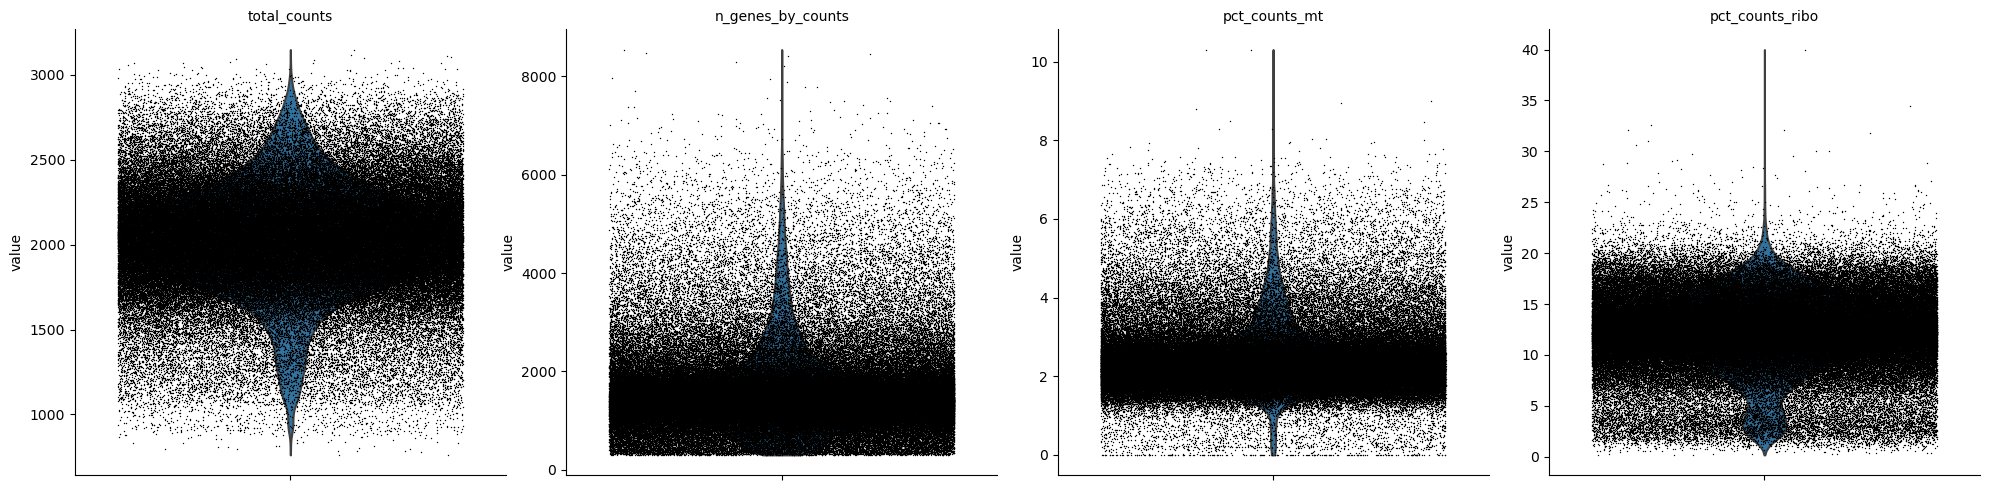

In [57]:
sc.pl.violin(adata,['total_counts','n_genes_by_counts','pct_counts_mt','pct_counts_ribo'],jitter=0.4,multi_panel=True)

In [58]:
adata.obs.groupby('sample').count()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
sample,,,,,,
GC01T,4040,4040,4040,4040,4040,4040
GC02T,12552,12552,12552,12552,12552,12552
GC03P,5538,5538,5538,5538,5538,5538
GC03T,8065,8065,8065,8065,8065,8065
GC04P,4561,4561,4561,4561,4561,4561
GC04T,5586,5586,5586,5586,5586,5586
GC05P,3694,3694,3694,3694,3694,3694
GC05T,4229,4229,4229,4229,4229,4229
GC06B,1457,1457,1457,1457,1457,1457


In [ ]:
adata.var_names_make_unique()
adata

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata,min_counts=400)
adata

In [ ]:
sc.pp.filter_genes(adata,min_cells=3)
adata

In [59]:
adata.X

<166533x24763 sparse matrix of type '<class 'numpy.float32'>'
	with 257399218 stored elements in Compressed Sparse Row format>

In [ ]:
# 稀疏矩阵转化
from scipy.sparse import csr_matrix
adata.X = csr_matrix(adata.X)

In [ ]:
sc.pp.normalize_total(adata,target_sum =None, exclude_highly_expressed =True, max_fraction = 0.1)

In [ ]:
sc.pp.log1p(adata, base=2)

In [60]:
adata.raw = adata

In [ ]:
adata.obs_keys

In [61]:
sc.pp.highly_variable_genes(adata,n_top_genes = 6000, flavor ='seurat', batch_key='sample')

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:4

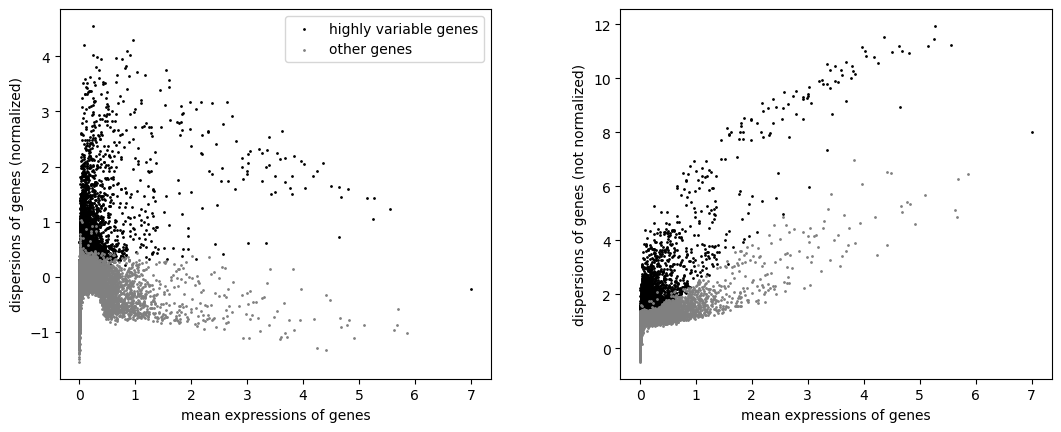

In [62]:
sc.pl.highly_variable_genes(adata)

In [63]:
adata = adata[:, adata.var.highly_variable]

In [64]:
adata.write_h5ad('../Data/before_scale.h5ad')

In [2]:
adata = sc.read_h5ad('../Data/before_scale.h5ad')

In [3]:
sc.pp.scale(adata,max_value=10)

# processing

In [4]:
sc.tl.pca(adata,svd_solver='arpack', use_highly_variable = True)

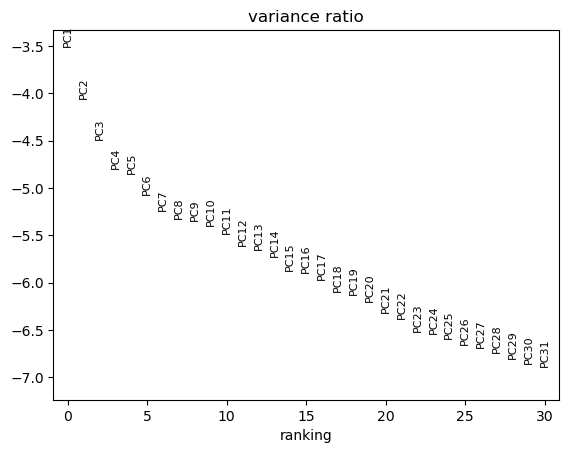

In [5]:
sc.pl.pca_variance_ratio(adata, log=True)

In [7]:
adata.write_h5ad('../Data/all_cell_virable.h5ad')

In [17]:
adata = sc.read_h5ad('../Data/all_cell_virable')

In [8]:
adata.obs

,sample,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
GC10B:AAACCTGAGACAGACC,GC10B,1592,2257.209961,42.450001,1.880640,224.559998,9.948565
GC10B:AAACCTGAGAGCTTCT,GC10B,403,1320.579956,10.250000,0.776174,21.049999,1.593997
GC10B:AAACCTGAGCCGATTT,GC10B,1501,2179.190186,48.330002,2.217796,246.470016,11.310165
GC10B:AAACCTGAGCTAGTTC,GC10B,1280,1667.400024,45.939999,2.755188,330.300049,19.809286
GC10B:AAACCTGAGGGTCGAT,GC10B,1905,2153.919922,44.799999,2.079929,253.429993,11.765989
...,...,...,...,...,...,...,...
GC09T:TTTGTCAGTAATTGGA,GC09T,1332,2029.039917,47.659996,2.348894,276.790009,13.641427
GC09T:TTTGTCAGTGACAAAT,GC09T,2124,2140.900146,49.770004,2.324723,297.970032,13.917979
GC09T:TTTGTCAGTGTTGAGG,GC09T,1898,2134.539795,51.980000,2.435185,288.660034,13.523291
GC09T:TTTGTCATCAGCTTAG,GC09T,1059,1846.170044,38.340004,2.076732,294.199921,15.935689


In [9]:
sc.pp.neighbors(adata,n_pcs=10,n_neighbors=50)

In [10]:
sc.tl.umap(adata, init_pos=adata.obsm['X_pca'][:,:2] *0.0001)

In [11]:
sc.tl.leiden(adata, resolution=0.1, key_added = 'cluster' )

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


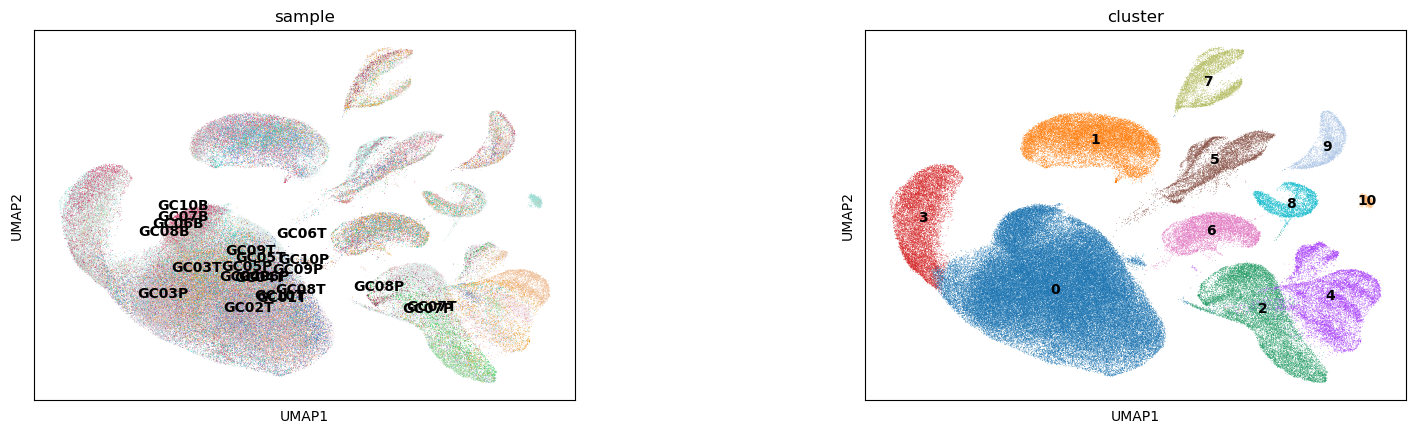

In [12]:
sc.pl.umap(adata, color=['sample','cluster'],size=1,wspace=0.4, legend_loc='on data')

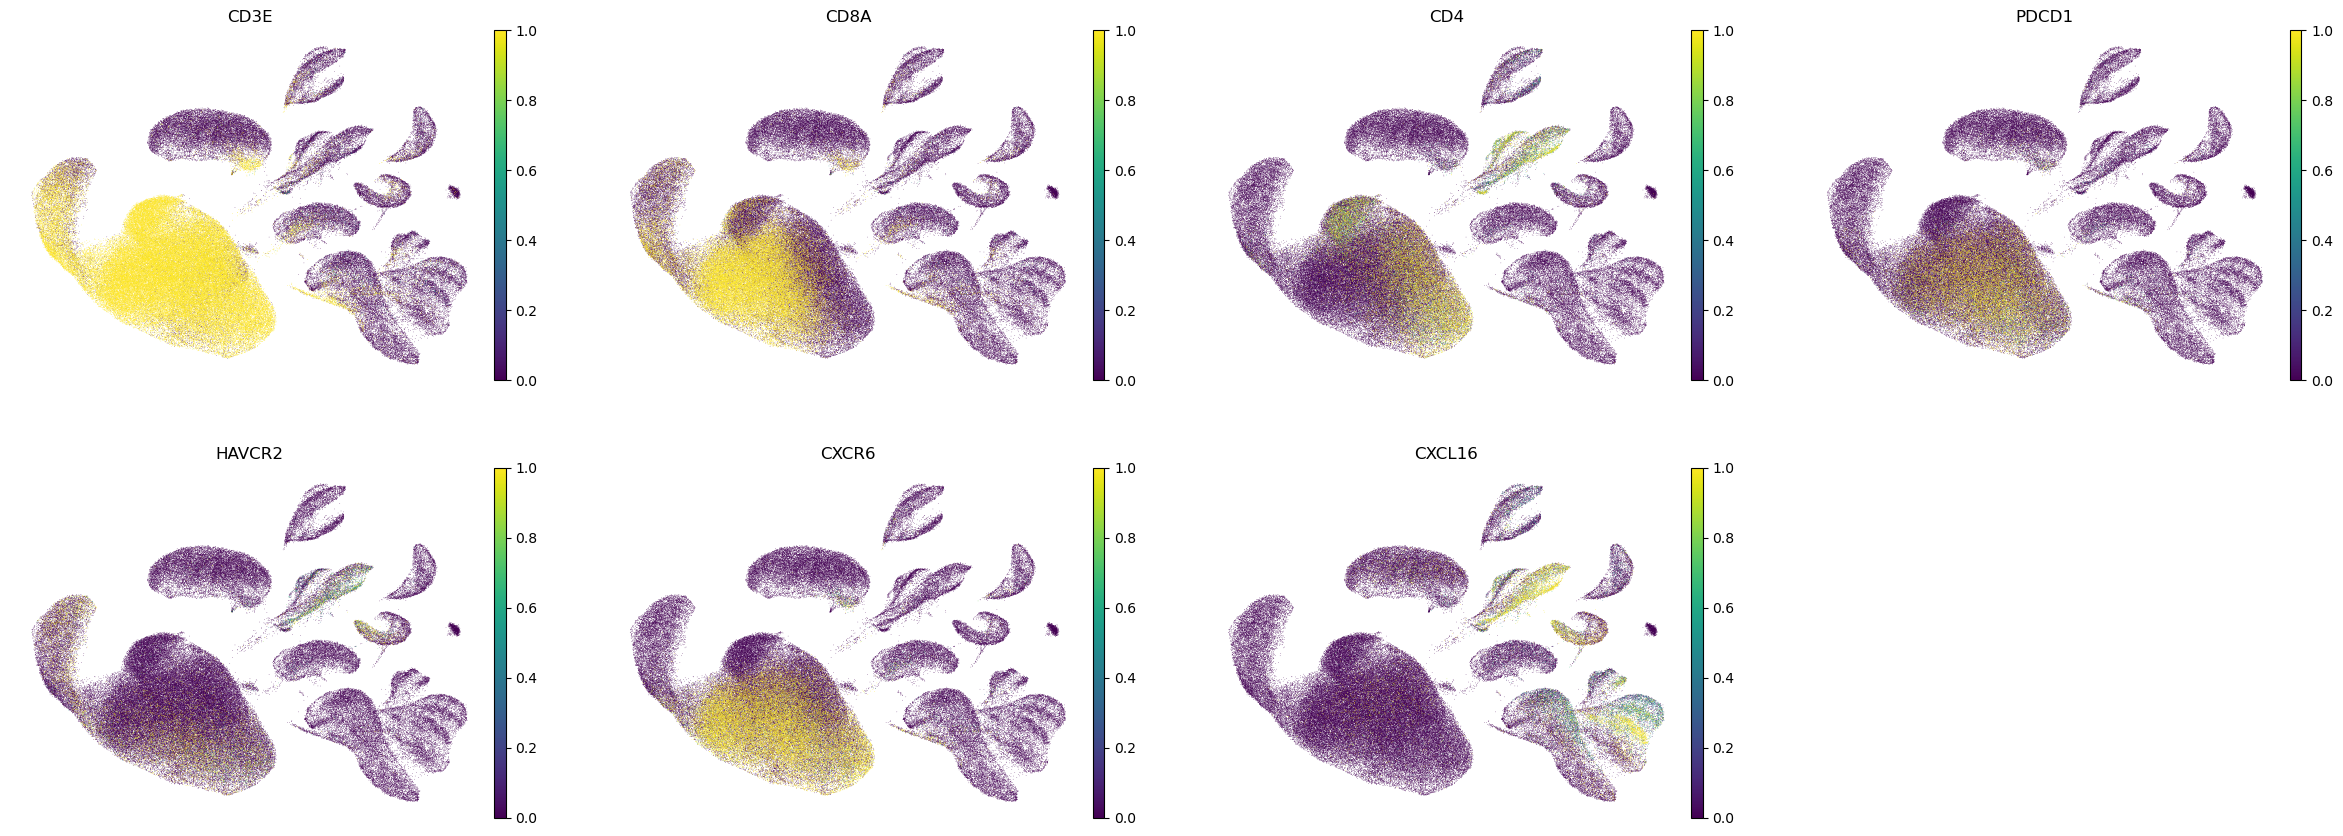

In [13]:
sc.pl.umap(adata, color = ['CD3E', 'CD8A', 'CD4','PDCD1','HAVCR2','CXCR6','CXCL16'], frameon = False,vmax = 1)

In [14]:
sc.tl.rank_genes_groups(adata,'cluster',method='wilcoxon')

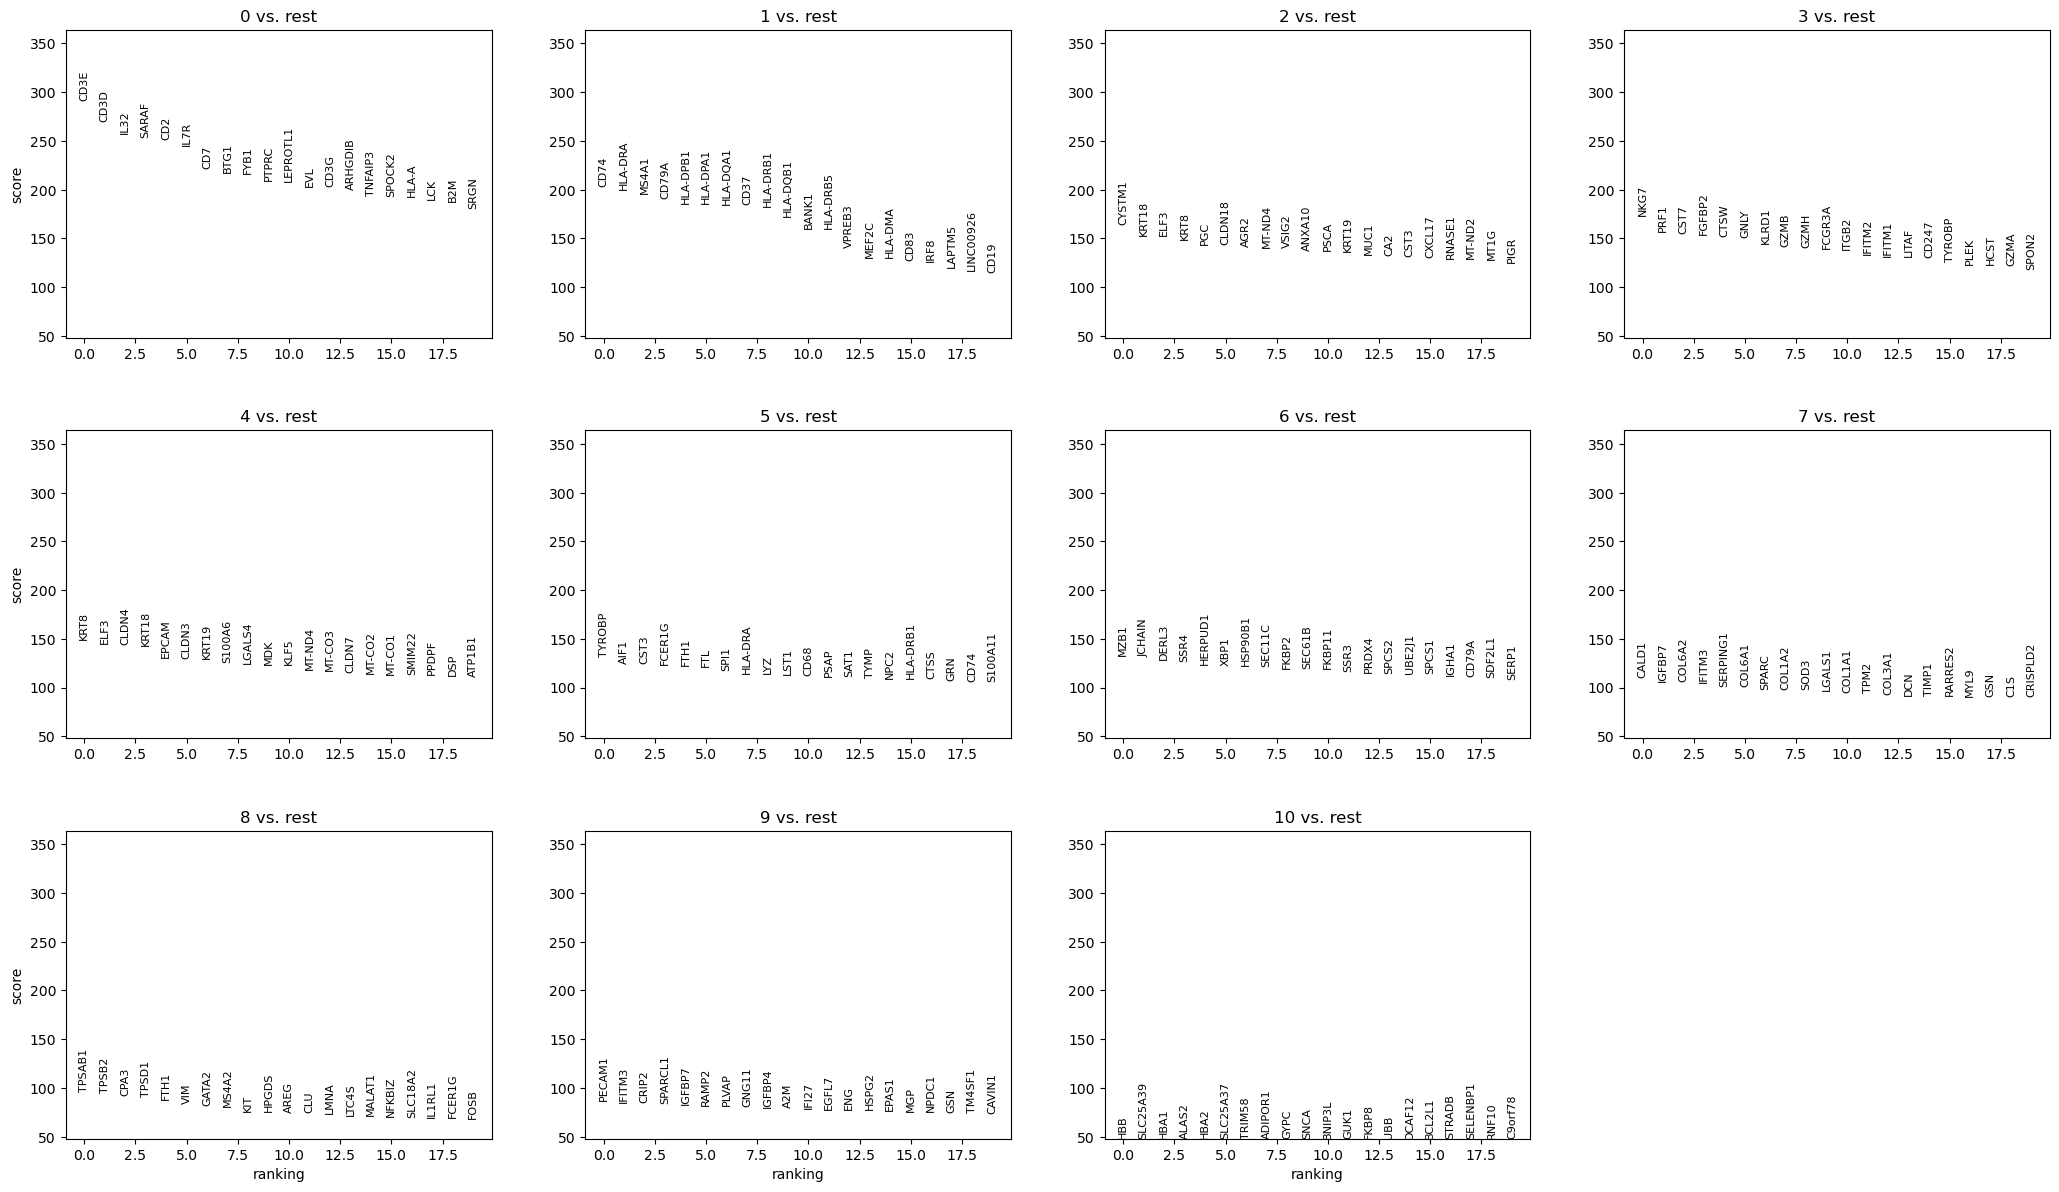

In [21]:
sc.pl.rank_genes_groups(adata, key='rank_genes_groups')

In [50]:
sc.tl.filter_rank_genes_groups(adata,max_out_group_fraction=0.6,min_in_group_fraction=0.1, min_fold_change = 2)

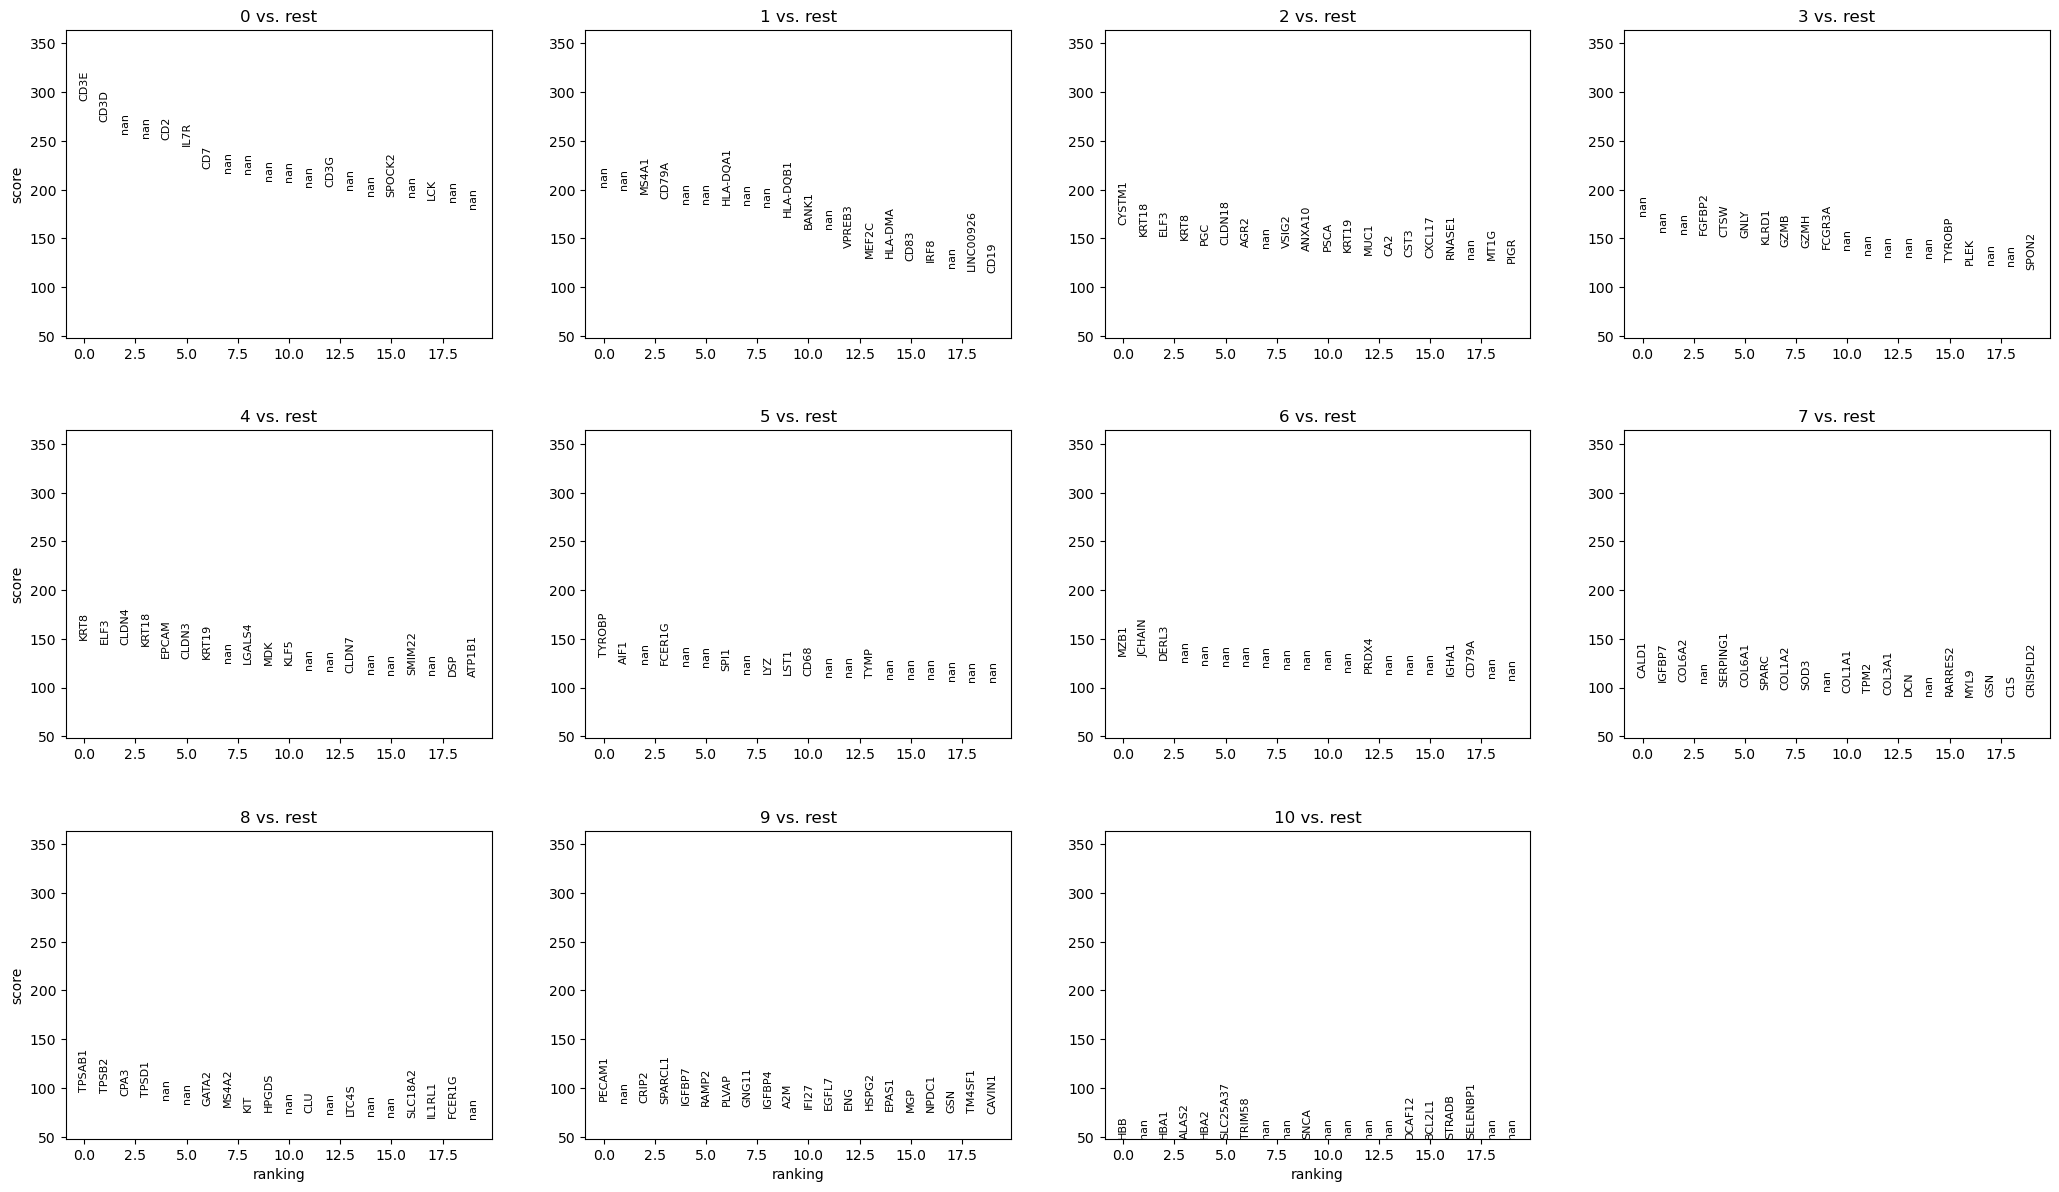

In [48]:
sc.pl.rank_genes_groups(adata, key='rank_genes_groups_filtered')

In [47]:
#sc.tl.dendrogram(adata,groupby='cluster')

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


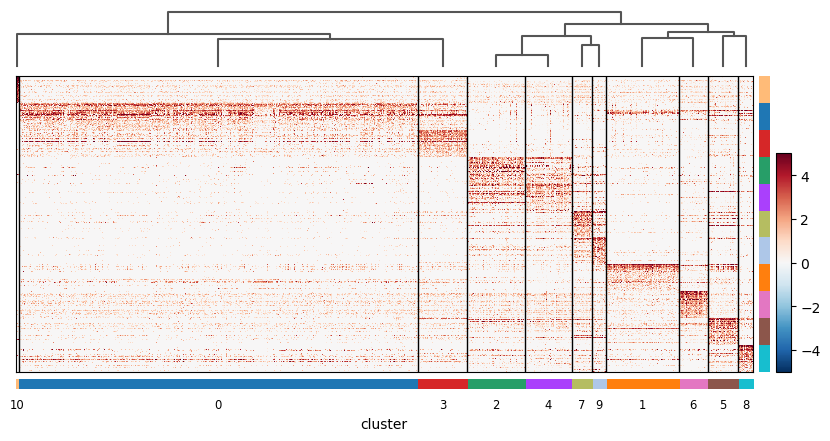

In [73]:
sc.pl.rank_genes_groups_heatmap(adata
                                ,groupby='cluster'
                                ,n_genes=50
                                ,swap_axes=True
                                #, figsize=(6,7)
                                ,use_raw=True
                                ,cmap='RdBu_r'
                                ,vmax = 5
                                ,vmin = -5
                                #,show_gene_labels=True
                                ,key='rank_genes_groups_filtered'
                                
                               )

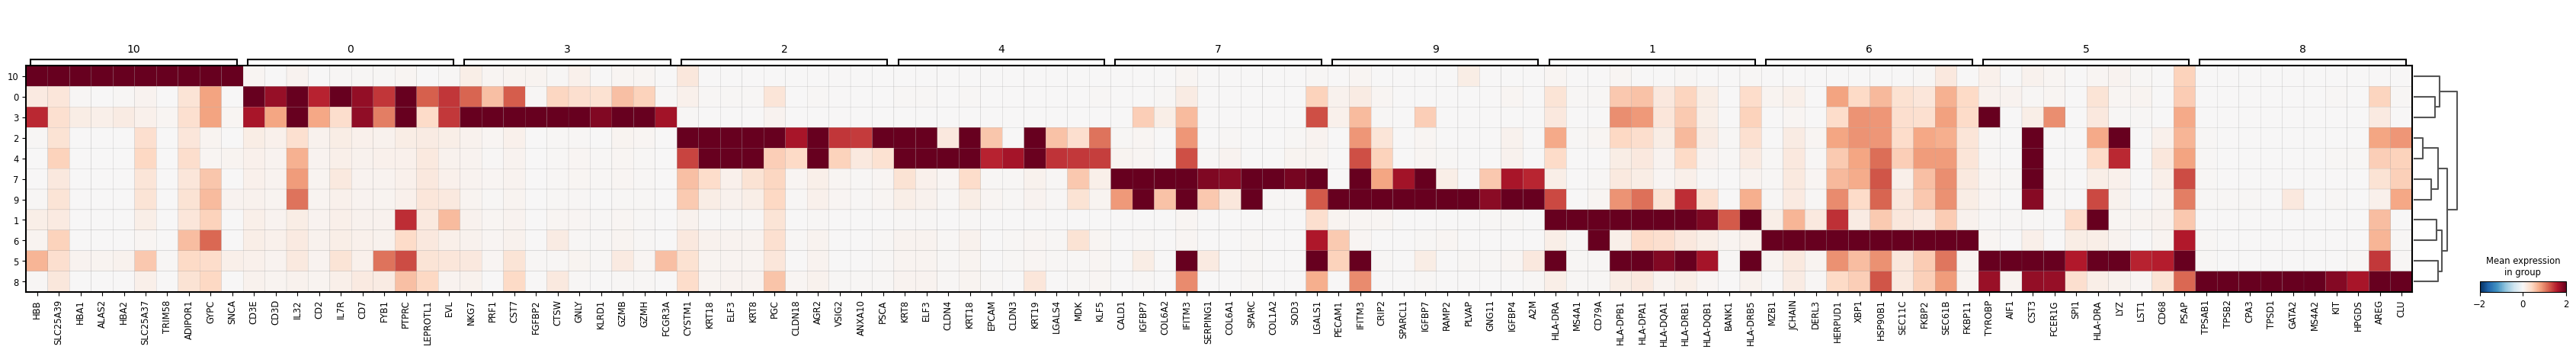

In [68]:
sc.pl.rank_genes_groups_matrixplot(adata
                                #,groupby='cluster'
                                #,n_genes=10
                                #,swap_axes=True
                                #, figsize=(6,7)
                                ,use_raw=True
                                ,cmap='RdBu_r'
                                ,vmax = 2
                                ,vmin = -2
                                #,show_gene_labels=True
                                ,key='rank_genes_groups_filtered'
                                
                               )

In [46]:
adata.var

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection,mean,std
KLHL17,ENSG00000187961,Gene Expression,False,1361,0.007574,99.182745,1261.269897,1361,True,0.008510,0.464374,0.776651,10,False,0.007231,0.091054
PLEKHN1,ENSG00000187583,Gene Expression,False,2029,0.011189,98.781623,1863.279907,2029,True,0.011287,0.318904,0.424486,6,False,0.010598,0.109403
HES4,ENSG00000188290,Gene Expression,False,9495,0.064845,94.298427,10798.905273,9495,True,0.052814,0.355465,0.655874,7,False,0.055758,0.252894
RNF223,ENSG00000237330,Gene Expression,False,2693,0.017596,98.382903,2930.316895,2693,True,0.021135,0.326910,0.488427,9,False,0.015331,0.145380
AL390719.2,ENSG00000272141,Gene Expression,False,2122,0.011911,98.725778,1983.540771,2122,True,0.014325,0.259069,0.294530,8,False,0.010671,0.114148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,ENSG00000198695,Gene Expression,True,121423,1.341817,27.087724,223458.031250,121423,True,0.871609,0.072233,0.600366,7,False,1.055068,0.762371
MT-CYB,ENSG00000198727,Gene Expression,True,164663,4.242771,1.122901,706564.562500,164663,True,1.684212,-0.657509,0.640079,11,False,2.367612,0.455288
AL354822.1,ENSG00000278384,Gene Expression,False,410,0.001849,99.753803,307.909943,410,True,0.001865,0.210117,0.199819,7,False,0.001757,0.043062
AC233755.2,ENSG00000277856,Gene Expression,False,171,0.002048,99.897318,341.039978,171,True,0.002688,0.731804,1.455639,14,False,0.001439,0.050096


/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


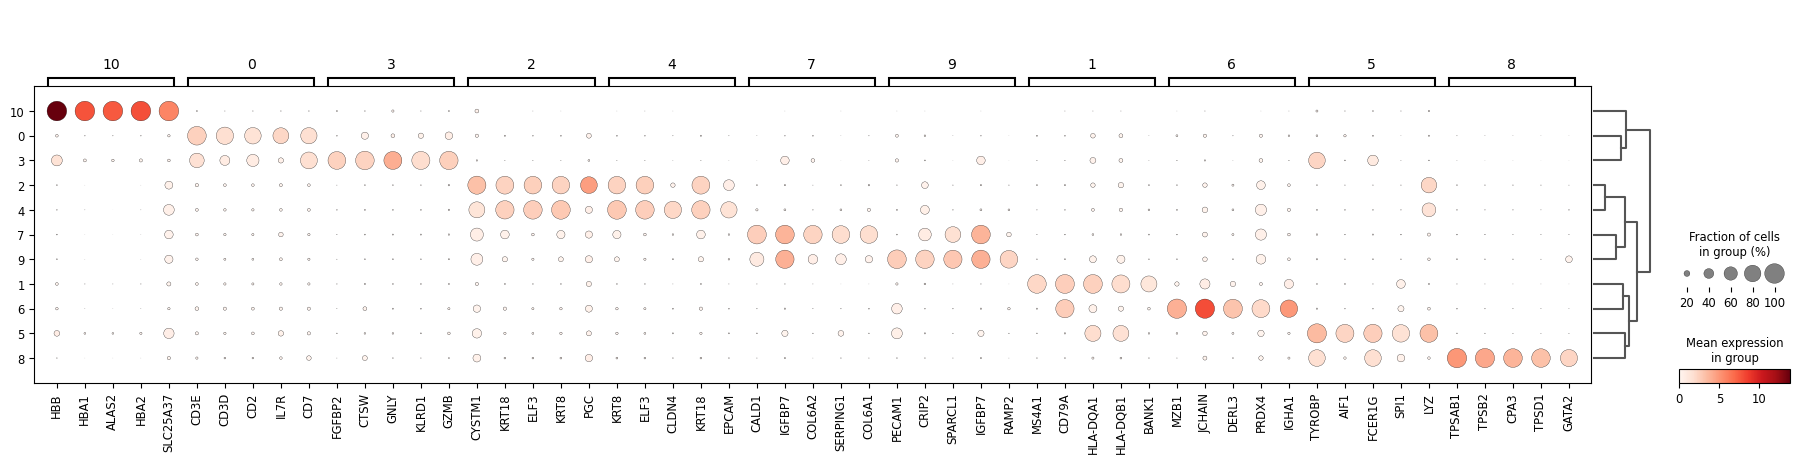

In [46]:
sc.pl.rank_genes_groups_dotplot(adata ,groupby='cluster',key='rank_genes_groups_filtered',n_genes=5, use_raw=True)